**NLP: ASSIGNMENT 1 TEXT CLASSIFICATION**

Importing Neccessary libraries

In [5]:
!pip install numpy
!pip install tensorflow
!pip install tensorflow_hub
!Install matplotlib
!pip install matplotlib
!pip install pandas
!pip install nltk
!pip install seaborn
!pip install -U scikit-learn

/bin/bash: Install: command not found


In [6]:
#globals().clear()  # clear all variables

import numpy as np
import re
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon',
               'popular'])

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")



[nltk_data] Downloading package stopwords to /home/sdp629/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sdp629/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sdp629/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sdp629/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sdp629/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/sdp629/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/sdp629/nltk_data...
[nltk_data]    |   Package gazetteers is already

Version:  2.13.1
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


2024-04-18 17:40:49.176036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 17:40:49.185128: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
data = pd.read_csv("Chatgpt.csv")

In [9]:
data

,Unnamed: 0,tweets,labels
0,1,"As of 2 minutes ago, @OpenAI released their ne...",bad
1,2,"Try talking with ChatGPT, our new AI system wh...",good
2,3,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad
3,4,"THRILLED to share that ChatGPT, our new model ...",good
4,5,#ai Models are set to become the search engine...,bad
...,...,...,...
3995,3996,"""Just had a great conversation with #ChatGPT f...",good
3996,3997,Personal DS &amp; Algos tutor ðŸ˜Š... Going to...,good
3997,3998,Asked #ChatGPT to write a fan fiction story in...,good
3998,3999,"ChatGPT is very powerful, but you need enough ...",good


In [10]:
data.describe()

,Unnamed: 0
count,4000.000000
mean,2000.500000
std,1154.844867
min,1.000000
25%,1000.750000
50%,2000.500000
75%,3000.250000
max,4000.000000


In [11]:
for i in data.tweets.head(10):
    print(i)
    print()

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\nðŸ¤¯ https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

#ai Models are set to become the search engines of the future, ATM they still struggle with veracityâ€¦ here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7u

In [12]:
# Remove all the tweet links since they all begin with https:

data['tweet_list'] = data['tweets'].str.split('https:')

In [13]:
data.head()

,Unnamed: 0,tweets,labels,tweet_list
0,1,"As of 2 minutes ago, @OpenAI released their ne...",bad,"[As of 2 minutes ago, @OpenAI released their n..."
1,2,"Try talking with ChatGPT, our new AI system wh...",good,"[Try talking with ChatGPT, our new AI system w..."
2,3,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad,[GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I ...
3,4,"THRILLED to share that ChatGPT, our new model ...",good,"[THRILLED to share that ChatGPT, our new model..."
4,5,#ai Models are set to become the search engine...,bad,[#ai Models are set to become the search engin...


In [14]:
# Select the text part of the list

text = [i[0] for i in data.tweet_list]

In [15]:
data['text'] = text
data = data[['text', 'labels']]
data.head()


,text,labels
0,"As of 2 minutes ago, @OpenAI released their ne...",bad
1,"Try talking with ChatGPT, our new AI system wh...",good
2,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad
3,"THRILLED to share that ChatGPT, our new model ...",good
4,#ai Models are set to become the search engine...,bad


In [16]:
for i in data.text.head(10):
    print(i)
    print()

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \n

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. 

GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY 

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. 

#ai Models are set to become the search engines of the future, ATM they still struggle with veracityâ€¦ here is #chatgpt by @OpenAI based on #GPT3. #seo\n\n

Just launched ChatGPT, our new AI system which is optimized for dialogue: 

Google is done.\n\nCompare the quality of these responses (ChatGPT) 

ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo. 

ChatGPT vs. riddles 

#0penAl just deployed a thing I've been helping build the last couple of months, it's a chatbot based on GPT 3. I'm really excited to share this vl\n



In [17]:
data['text'] = data['text'].astype(str)

/tmp/ipykernel_15316/2505709679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


In [18]:
# Ensure 'text' column is of string type
data['text'] = data['text'].apply(lambda x: str(x))

# Check for any null values in 'text' column
print("Null values in 'text' column:", data['text'].isnull().sum())

# Check for non-string values in 'text' column
non_string_values = data['text'][data['text'].apply(lambda x: type(x) != str)]
print("Non-string values in 'text' column:", non_string_values)

Null values in 'text' column: 0
Non-string values in 'text' column: Series([], Name: text, dtype: object)


/tmp/ipykernel_15316/846306833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: str(x))


TEXT PREPROCESSING

In [19]:
import string
from nltk.tokenize import word_tokenize

In [20]:
# Layer of text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove '\n' from words
    text = text.replace('\n', '')

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove non-alphanumeric characters
    #text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove mentions, and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove emojis and other non-ASCII characters
    text = ''.join(char for char in text if char.isascii())

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Tokenization using simple splitting
    tokens = text.split()

    # Tokenization using NLTK
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [21]:
data['text'] = data['text'].apply(preprocess_text)
data.head()

/tmp/ipykernel_15316/117680462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(preprocess_text)


,text,labels
0,as of 2 minutes ago openai released their new ...,bad
1,try talking with chatgpt our new ai system whi...,good
2,god damn it openai stop announcing things i am...,bad
3,thrilled to share that chatgpt our new model o...,good
4,ai models are set to become the search engines...,bad


In [22]:
for i in data.text.head(10):
    print(i)
    print()

as of 2 minutes ago openai released their new chatgpt nnand you can use it right now n n

try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help us improve it

god damn it openai stop announcing things i am too busy

thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone

ai models are set to become the search engines of the future atm they still struggle with veracity here is chatgpt by openai based on gpt3 seonn

just launched chatgpt our new ai system which is optimized for dialogue

google is donenncompare the quality of these responses chatgpt

chatgpt coming out strong refusing to help me stalk someone but agreeing providing that someone is waldo

chatgpt vs riddles

0penal just deployed a thing ive been helping build the last couple of months its a chatbot based on gpt 3 im really excited to share this vln



In [23]:
# set the percentages of training, validation and testing dataset
test_percentage = 0.1
validation_percentage = 0.1


X = data.text.values
y = data.labels.values

In [24]:
 # convert the labels into numbers
y[y == 'bad'] = 0
y[y == 'good'] = 1
y = np.asarray(y).astype('float32')

# Partition the data into training and testing
test_examples = np.asarray(X[:round(test_percentage * len(X))])
train_examples = np.asarray(X[round(test_percentage * len(X)):])

test_labels = np.asarray(y[:round(test_percentage * len(X))])
train_labels = np.asarray(y[round(test_percentage * len(X)):])

print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 3600, test entries: 400


In [25]:
# Build the model and show its layers; model has two fully connected layers with hidden units of 16 and 1, respectively
model = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"


hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))  # because it's binary classification
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191433 (183.84 MB)
Trainable params: 48191433 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:

# the loss function and metric are compatible with binary classification scenarios
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [27]:
# extracting validation examples from the training data
x_val = train_examples[:round(validation_percentage * len(train_examples))]
partial_x_train = train_examples[round(validation_percentage * len(train_examples)):]

y_val = train_labels[:round(validation_percentage * len(train_examples))]
partial_y_train = train_labels[round(validation_percentage * len(train_examples)):]


In [28]:
import time

In [29]:
start_time = time.time()

# training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


end_time = time.time()

training_time  = end_time - start_time

print(f"Training time: {training_time:.2f} seconds")

Epoch 1/30
7/7 [==============================] - 2s 260ms/step - loss: 0.6854 - accuracy: 0.5636 - val_loss: 0.6764 - val_accuracy: 0.6306
Epoch 2/30
7/7 [==============================] - 2s 239ms/step - loss: 0.6612 - accuracy: 0.6966 - val_loss: 0.6612 - val_accuracy: 0.6361
Epoch 3/30
7/7 [==============================] - 2s 237ms/step - loss: 0.6397 - accuracy: 0.7349 - val_loss: 0.6468 - val_accuracy: 0.6528
Epoch 4/30
7/7 [==============================] - 2s 238ms/step - loss: 0.6168 - accuracy: 0.7552 - val_loss: 0.6312 - val_accuracy: 0.6694
Epoch 5/30
7/7 [==============================] - 2s 237ms/step - loss: 0.5921 - accuracy: 0.7787 - val_loss: 0.6141 - val_accuracy: 0.7083
Epoch 6/30
7/7 [==============================] - 2s 240ms/step - loss: 0.5646 - accuracy: 0.7991 - val_loss: 0.5957 - val_accuracy: 0.7306
Epoch 7/30
7/7 [==============================] - 2s 237ms/step - loss: 0.5338 - accuracy: 0.8278 - val_loss: 0.5757 - val_accuracy: 0.7444
Epoch 8/30
7/7 [====

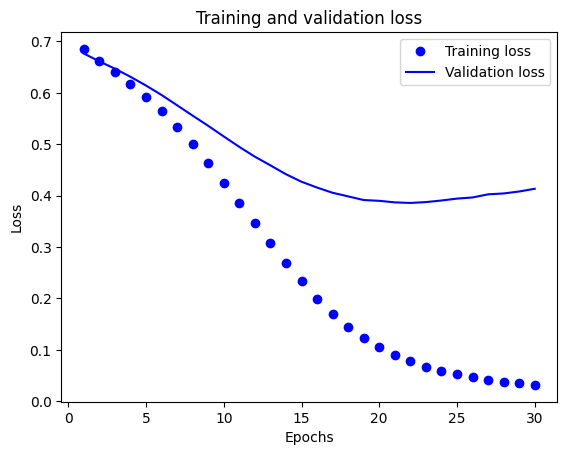

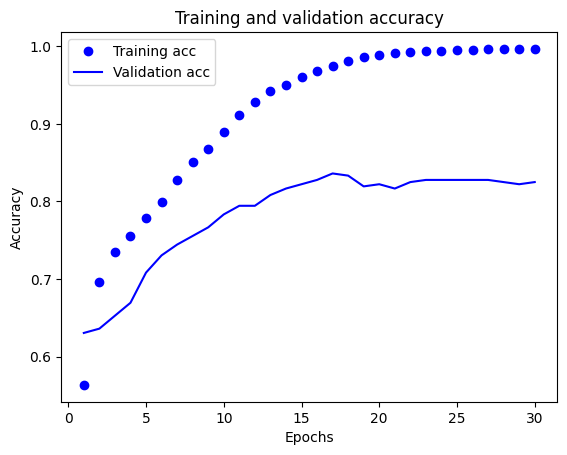

13/13 [==============================] - 0s 15ms/step - loss: 0.3467 - accuracy: 0.8550
[0.34667685627937317, 0.8550000190734863]


In [30]:
# see model training history
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()  # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


results = model.evaluate(test_examples, test_labels)  # this return loss value and accuracy
print(results)



In [31]:
# another method to evaluate performance
predictions = model.predict(test_examples)
predictions[predictions >= 0] = 1
predictions[predictions < 0] = 0
confusionMatrix = confusion_matrix(test_labels, predictions, normalize='pred')
acc = metrics.accuracy_score(test_labels, predictions)
print(classification_report(test_labels, predictions))

13/13 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       200
         1.0       0.84      0.87      0.86       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


13/13 [==============================] - 0s 15ms/step


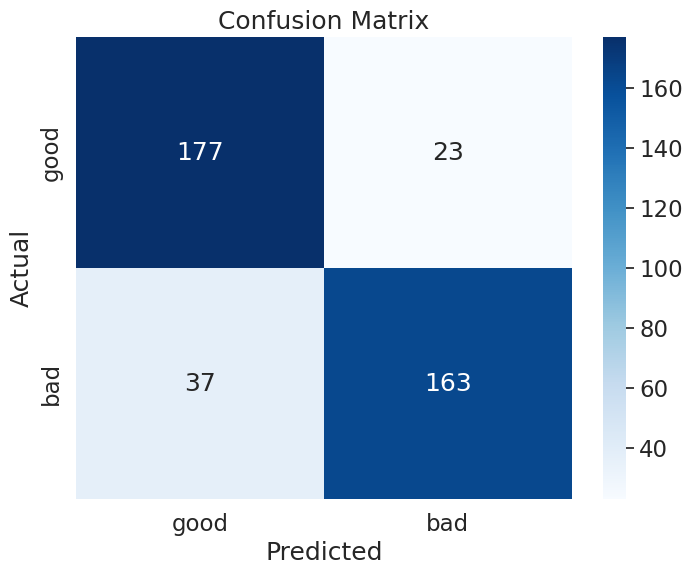

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
predictions = model.predict(test_examples)
predictions = (predictions > 0.5)  # Convert probabilities to binary predictions

# Define class labels
class_labels = ["good", "bad"]

# Create confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
